Traditionally, models used for object detection require labeled image datasets for training, and are limited to detecting the set of classes from the training data.

Zero-shot object detection, however, is supported by the OWL-ViT model which uses a different approach. OWL-ViT is an open-vocabulary object detector. It means that it can detect objects in images based on free-text queries without the need to fine-tune the model on labeled datasets.

OWL-ViT leverages multi-modal representations to perform open-vocabulary detection. It combines CLIP with lightweight object classification and localization heads. Open-vocabulary detection is achieved by embedding free-text queries with the text encoder of CLIP and using them as input to the object classification and localization heads. These heads associate images and their corresponding textual descriptions, and ViT processes image patches as inputs. The authors of OWL-ViT first trained CLIP from scratch and then fine-tuned OWL-ViT end to end on standard object detection datasets using a bipartite matching loss. With this approach, the model can detect objects based on textual descriptions without prior training on labeled datasets.

This guide shows how to use OWL-ViT:
1. to detect objects based on text prompts
2. for batch object detection
3. for image-guided object detection

# Libraries

In [1]:
pip install -q transformers

Note: you may need to restart the kernel to use updated packages.


In [2]:
from transformers import pipeline
import skimage
import numpy as np
from PIL import Image


2024-09-05 20:53:00.999958: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Zero-shot object detection pipeline

In [3]:
# The simplest way to try out inference with OWL-ViT is to use it in a pipeline()
# Instantiate a pipeline for zero-shot object detection from a checkpoint on the Hugging Face Hub
checkpoint = "google/owlv2-base-patch16-ensemble"
detector = pipeline(model=checkpoint, task="zero-shot-object-detection")

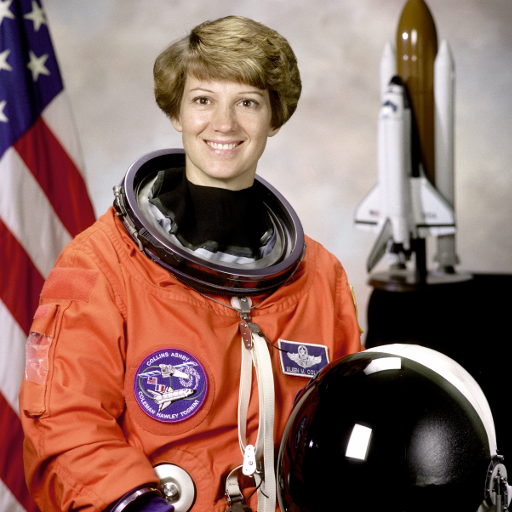

In [ ]:
# Choose an image you’d like to detect objects in. 
# Here we’ll use the image of astronaut Eileen Collins...
# ...part of the NASA Great Images dataset
image = skimage.data.astronaut()
image = Image.fromarray(np.uint8(image)).convert("RGB")

image